## 6.2 Diffusion Equation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Program to solve the 1-D diffusion equation, 

$$
\frac{\partial{}}{\partial{t}} T(x,t) = \kappa \frac{\partial{}^2}{\partial{x}^2} T(x,t)
$$

Using the Forward Time Centred Space (FTCS) Scheme and Dirichlet Boundary Conditions, and comparing to an analytic soln using the method of images.

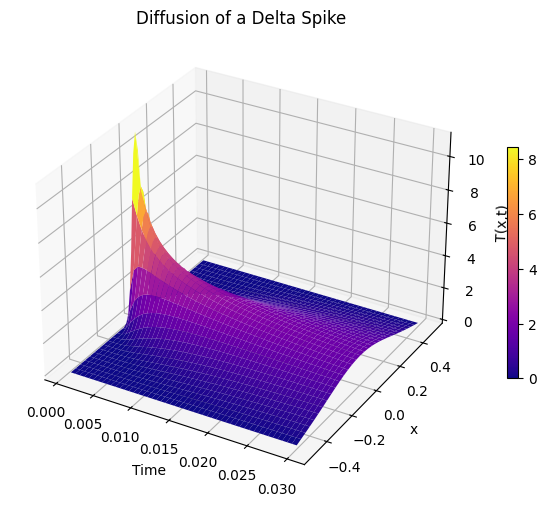

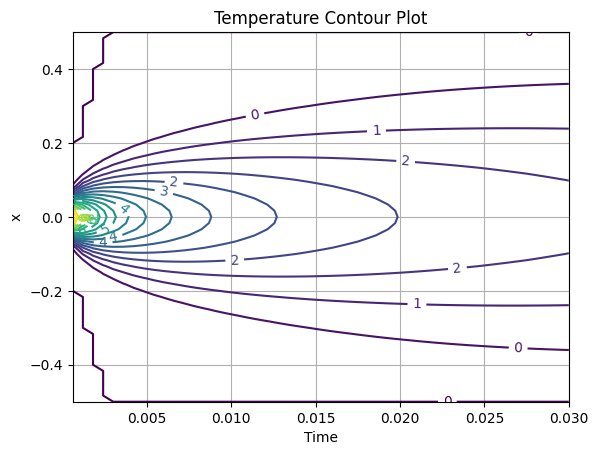

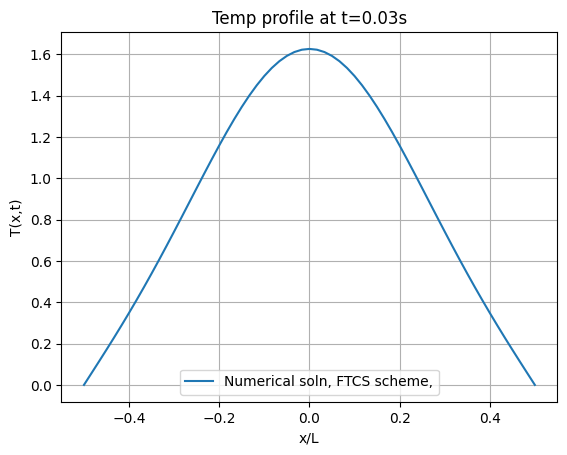

In [3]:
# Intialise Params
tau = 0.0001        # time step
N =  61             # NUmber of grid points
h = 1 / (N-1)       # grid spacing
k = 1               # constant of thermal diffusion
t_sig = h**2 / (2*k)    # time the width sigma takes to increase by 1 grid space
L = 1.
coeff = k * tau / h**2

# Set ICs and BCs
tt = np.zeros(N)        # set temp to zero at all points
tt[int(N/2)] = 1/h      # IC delta funct in centre

# Set up loop & plot variables
xplot = np.arange(N)*h - L/2        
iplot = 0
nstep = 300
nplots = 50
plot_step = nstep / nplots

ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

for i in range(nstep):
    # compute new temp using FTCS
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])       # This maintains the BC that the end points=0

    # Record temp for plotting intermittently
    if (i+1) % plot_step < 1:
        ttplot[:,iplot] = np.copy(tt)
        tplot[iplot] = (i+1) * tau
        iplot += 1
    
# Plot temp versus x and t as a wire-mesh plot 
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(9,6))
Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp,Xp,ttplot, cmap='plasma')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')                # Not sure why this isnt working
ax.set_title('Diffusion of a Delta Spike')
plt.colorbar(surf, shrink=0.5)
plt.show()

# Contour Plot:
levels = np.linspace(0,10,21)
ct = plt.contour(tplot, xplot, ttplot, levels)
plt.clabel(ct,fmt='%1.0f')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Temperature Contour Plot')
plt.grid()
plt.show()

# plot temp distribution for final frame, t=0.03
xscaled = xplot / L
plt.plot(xscaled, ttplot[:, nplots-1], label='Numerical soln, FTCS scheme,')
plt.grid()
plt.xlabel('x/L')
plt.ylabel('T(x,t)')
plt.legend(loc='lower center')
plt.title('Temp profile at t=0.03s')
plt.show()

Numerically evaluating the Analytic soln (at t=0.03):

In [4]:
t = 0.03
x0 = 0
k = 1
L = 1
xfunc = np.linspace(-1.5, 1.5, 183)
sigma = np.sqrt(2*k*t)
T_g = lambda n: (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(((xfunc + n)- x0)**2) / (2*sigma**2))
xplot1 = np.linspace(-1.5,1.5,183)

T_p = (-1)**0 * T_g(0)
T_pm1 = (-1)**-1 * T_g(-1)
T_p1 = (-1)**1 * T_g(1)

T_sum = T_p + T_pm1 + T_p1 


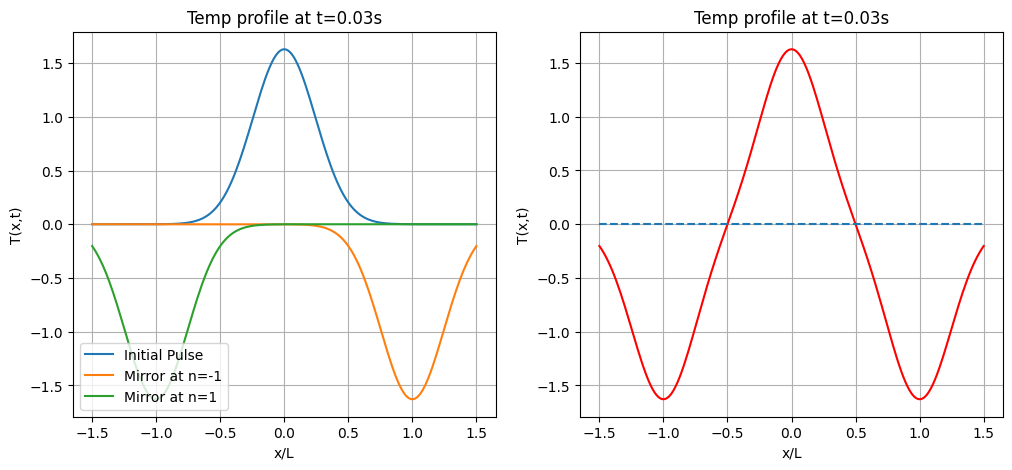

In [6]:
xscaled = xplot1/L
plt.figure(None, figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(xfunc, T_p, label='Initial Pulse')
plt.plot(xscaled, T_pm1, label='Mirror at n=-1')
plt.plot(xscaled, T_p1,label='Mirror at n=1')
plt.grid()
plt.xlabel('x/L')
plt.ylabel('T(x,t)')
plt.legend(loc='lower left')
plt.title('Temp profile at t=0.03s')

plt.subplot(1,2,2)
ref_line = np.zeros(len(xscaled))
plt.plot(xscaled, T_sum, 'r')
plt.plot(xscaled, ref_line, '--')
plt.grid()
plt.xlabel('x/L')
plt.ylabel('T(x,t)')
plt.title('Temp profile at t=0.03s')
plt.show()

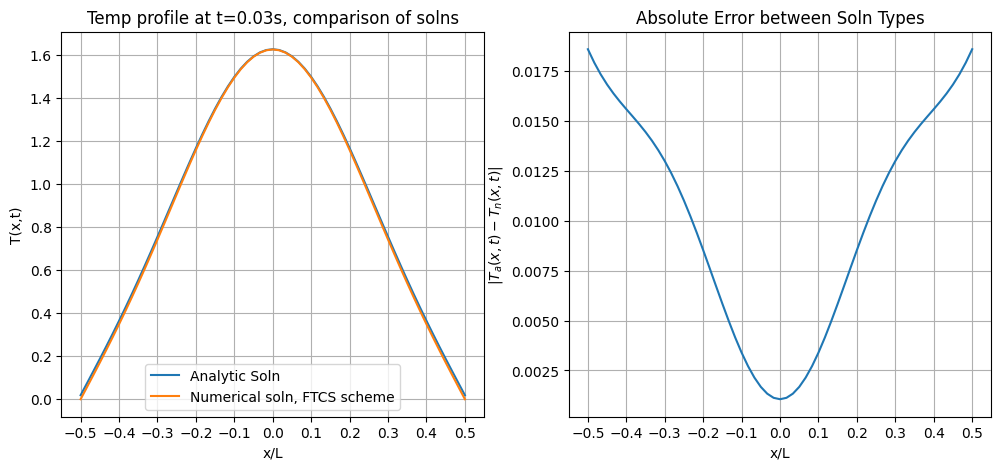

In [7]:
# Tplot are values evaluated analytically
# ttplot are values calculated numerically

Tplot = []
for i in T_sum:
    if i >= 0: 
        Tplot.append(i)
xplot = np.linspace(-L/2, L/2, len(Tplot))
err = np.abs(Tplot - ttplot[:, nplots-1])

plt.figure(None, figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(xplot, Tplot, label='Analytic Soln')
plt.plot(xplot, ttplot[:, nplots-1], label='Numerical soln, FTCS scheme')
plt.grid()
plt.xlabel('x/L')
plt.ylabel('T(x,t)')
plt.legend(loc='lower center')
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.title('Temp profile at t=0.03s, comparison of solns')

plt.subplot(1,2,2)
plt.plot(xplot, err)
plt.grid()
plt.title('Absolute Error between Soln Types')
plt.xlabel('x/L')
plt.ylabel('$|T_a(x,t) - T_n(x,t)|$')
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.show()

Error is on the order of $10^{-3}$ to $10^{-2}$, with the greatest error at the ends of the bar, where the analytic soln has failed to impose the boundary conditions (why???).
* Could be due to not being evaluted at enough data points, so misses zero exactly (initial intuition)
* Realising now it is likely a small error due to the small contribution of heat from the images at n=-2,2; which were not included.


Tinkered version is trying to fix this by evaluating the analytic soln at more data-points, proving to be harder then expected..